# **TELCO CUSTOMER CHURN PREDICTION**


### **Project Overview**

The primary objective of this project is to develop a predictive model that accurately identifies customers who are likely to churn in the near future. By leveraging historical data, the model aims to help the telecommunications company proactively retain at-risk customers through targeted interventions and personalized offers.

I will be leveraging the widely used CRISP-DM Framework for this project.

The CRISP-DM (Cross-Industry Standard Process for Data Mining) framework is a widely used methodology for data mining and data analysis projects. It provides a structured approach for planning and executing data projects. The process is cyclic and iterative, consisting of six phases:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## **Business Understanding**


### **Hypotheses**
- Hypothesis 1:

Assumption : Customers with longer tenure are less likely to churn.

Rationale behind assumption : Long-term customers may have higher satisfaction and loyalty due to their prolonged association with the company and potential benefits received over time.


- Hypothesis 2:

Assumption : Customers who use multiple services (e.g., Internet, phone, TV) are less likely to churn compared to those who use fewer services.

Rationale behind assumption : Customers with bundled services may find it more convenient and cost-effective to stay with the provider, making them less likely to switch.


- Hypothesis 3:

Assumption : Customers with higher monthly charges are more likely to churn.

Rationale behind assumption : Higher monthly charges might indicate dissatisfaction with the value for money, leading customers to seek cheaper alternatives.


### **Important Business Questions**

1. What are the main reasons behind customer churn?

   - Understanding the primary factors contributing to churn can help in addressing the root causes and developing effective retention strategies.


2. Which customer demographics (e.g., age, gender, marital status) are more likely to churn?

   - Identifying specific demographic groups that are more prone to churn can help tailor marketing and retention efforts to those segments.


3. How does the length of the customer's tenure impact their likelihood to churn?

   - Analyzing the relationship between tenure and churn can reveal whether long-term customers are more loyal and what measures can be taken to extend customer tenure.


4. What role do service issues (e.g., technical support, service outages) play in customer churn?

   - Assessing the impact of service quality on churn can guide improvements in customer support and service reliability.


5. How do different payment methods (e.g., automatic payments vs. manual payments) affect churn rates?

   - Understanding the influence of payment methods on churn can help in promoting more stable payment options that reduce churn.


6. What is the impact of contract types (e.g., month-to-month vs. annual contracts) on customer retention?

   - Analyzing how contract terms affect churn can inform decisions on offering more flexible or beneficial contract options to customers.


7. Which services or combinations of services (e.g., Internet, phone, TV) have the highest and lowest churn rates?

   - Identifying which services are most and least likely to retain customers can help in designing better service packages and cross-selling strategies.

In [120]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Then I will go ahead to get my credentials needed to connect to the database, from my .env file.

In [121]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#create connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [122]:
connection = pyodbc.connect(connection_string)

## **Data Understanding**

The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

The first 3000 records of the dataset can be found in a database I will be connecting to using some credentials.

The second part of the data is hosted on a GitHub Repository in a file called LP2_Telco-churn-second-2000.csv.

The final 2000 records of the data set needed for this project can be found in a OneDrive. The filed is named Telco-churn-last-2000.xlsx. 

Below are the columns and their descriptions:

| Attribute          | Description                                                    |
|--------------------|----------------------------------------------------------------|
| Gender             | Whether the customer is a male or a female                     |
| SeniorCitizen      | Whether a customer is a senior citizen or not                  |
| Partner            | Whether the customer has a partner or not (Yes, No)            |
| Dependents         | Whether the customer has dependents or not (Yes, No)           |
| Tenure             | Number of months the customer has stayed with the company      |
| PhoneService       | Whether the customer has a phone service or not (Yes, No)      |
| MultipleLines      | Whether the customer has multiple lines or not                 |
| InternetService    | Customer's internet service provider (DSL, Fiber Optic, No)    |
| OnlineSecurity     | Whether the customer has online security or not (Yes, No, No Internet) |
| OnlineBackup       | Whether the customer has online backup or not (Yes, No, No Internet) |
| DeviceProtection   | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport        | Whether the customer has tech support or not (Yes, No, No internet) |
| StreamingTV        | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies    | Whether the customer has streaming movies or not (Yes, No, No Internet service) |
| Contract           | The contract term of the customer (Month-to-Month, One year, Two year) |
| PaperlessBilling   | Whether the customer has paperless billing or not (Yes, No)    |
| PaymentMethod      | The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic)) |
| MonthlyCharges     | The amount charged to the customer monthly                     |
| TotalCharges       | The total amount charged to the customer                       |
| Churn              | Whether the customer churned or not (Yes or No)                |


In [123]:
# query the database for the first part of the data and assign it a variable name 'df1'
query = "Select * from dbo.LP2_Telco_churn_first_3000"

df1 = pd.read_sql(query, connection)

In [124]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [125]:

# read in the second part of the data from github and assign it a variable name 'df2'
git_raw_url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'

df2 = pd.read_csv(git_raw_url)
df2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [126]:
# reading in test data from github repo
url = 'https://raw.githubusercontent.com/richmond-yeboah/Customer-Churn-Prediction/main/Data/Telco-churn-last-2000.csv'

df_test = pd.read_csv(url)

df_test.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [127]:
# first check if the columns in df1 are the same as df2 before conactenation
df1.columns == df2.columns
    

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [128]:
# concatenate training data
df_train = pd.concat([df1, df2], ignore_index=True)
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### **Exploratory Data Analysis**

In [129]:
# check total number of rows and columns in the dataset
df_train.shape

(5043, 21)

In [130]:
# overview of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


As seen from the overview of the data above, 'SeniorCitizen' is supposed to be an object data type though it contains 0s and 1s.

'TotalCharges' is also not supposed to be an object, therefore the right data types will be assigned to these two columns.

In [ ]:
# changing to appropriate data types
df_train['SeniorCitizen'] = df_train['SeniorCitizen'].astype(object)
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce') # for the sake of missing values that will considered as empty strings

In [151]:
# check for missing values and percentage
missing_values = df_train.isna().sum()
missing_percentage = (df_train.isna().sum() / df_train.shape[0])*100

# Create a DataFrame with the number of missing values and their percentage
missing_df = pd.DataFrame({
    'Column': df_train.columns,
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).reset_index(drop=True)

# Display the DataFrame
missing_df = pd.DataFrame(missing_df)
missing_df

,Column,Missing Values,Percentage
0,customerID,0,0.000000
1,gender,0,0.000000
2,SeniorCitizen,0,0.000000
3,Partner,0,0.000000
4,Dependents,0,0.000000
5,tenure,0,0.000000
6,PhoneService,0,0.000000
7,MultipleLines,269,5.334127
8,InternetService,0,0.000000
9,OnlineSecurity,651,12.908983


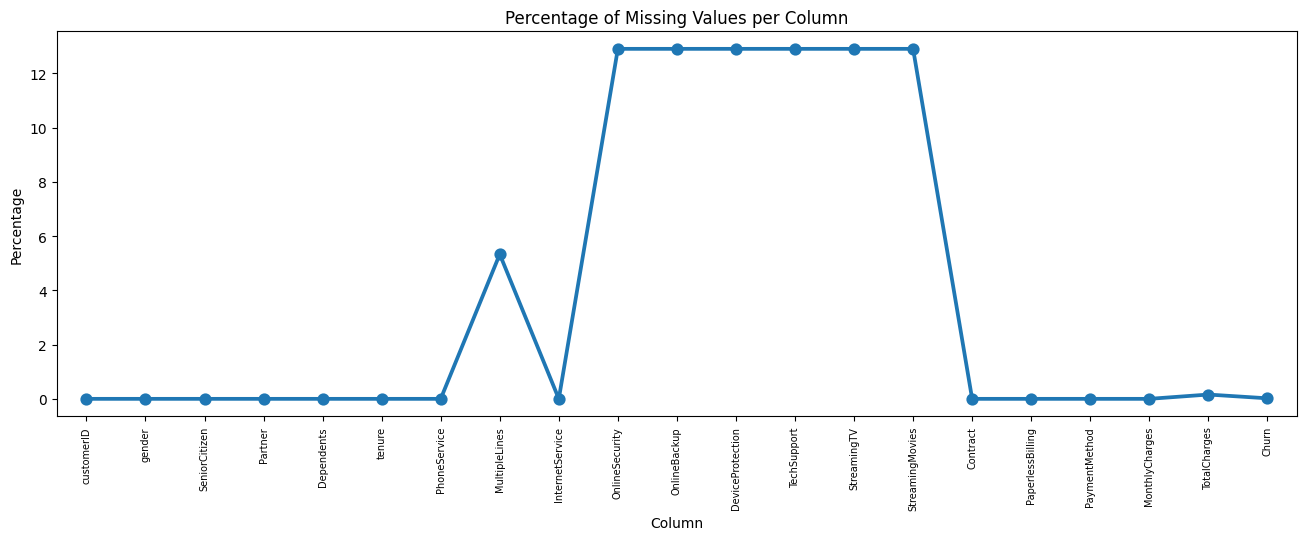

In [152]:


plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing_df)
plt.xticks(rotation=90, fontsize=7)
plt.title('Percentage of Missing Values per Column')
plt.show()

In [132]:
# descriptive statistics of only the numerical columns
df_train.describe()

,tenure,MonthlyCharges,TotalCharges
count,5043.000000,5043.000000,5035.000000
mean,32.576641,65.090214,2302.062861
std,24.529807,30.068133,2269.483576
min,0.000000,18.400000,18.799999
25%,9.000000,35.775000,417.675003
50%,29.000000,70.550003,1401.150024
75%,56.000000,90.050003,3862.000000
max,72.000000,118.650002,8670.100000


**Insights from the descriptive statistics above**

Average:

- The average tenure is 32 months and 2 weeks.
- The average monthly charge for customers is 65 units.
- The average total charge for customers is 2,302 units.

Median(50th Percentile):

- The median tenure is 29 months.
- The median monthly charge for customers is 70.6 units.
- The median total charge for customers is 1,401 units.

75th percentile:

- 75% of customers have a tenure of less than 56 months.
- 90 units being the 75th percentile for monthly charges indicate that 25% of customers have monthly charges greater than 90 units.
- 3,862 units being the 75th percentile for total charges show that 25% of customers have total charges greater than 3,862 units.


In [133]:
# loop through columns in training data
for column in df_train.columns:

    #check if the column is not a numerical column
    if (df_train[column].dtype not in ['int64', 'float64']):

        # print out unique values in categorical columns
        print(f'column: {column}\nunique values: {df_train[column].unique()}')
        print(70 * '-')

    

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: SeniorCitizen
unique values: [0 1]
----------------------------------------------------------------------
column: Partner
unique values: [True False 'No' 'Yes']
----------------------------------------------------------------------
column: Dependents
unique values: [False True 'No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: [False True 'Yes' 'No']
----------------------------------------------------------------------
column: MultipleLines
unique values: [None False True 'No' 'No phone service' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique valu

As seen from the output above, a lot of the categorical columns contain values boolean values(True, False) and 'Yes' and 'No' values which are the same meaning as the boolean values but are viewed differently in python. To solve this issue, we either change the boolean values to 'Yes' and 'No', or the other way round.

In [134]:
   
columns_to_change = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'PaperlessBilling']
for column in columns_to_change:    
    df_train[column].replace({True: 'Yes', False: 'No', 'No internet service': 'No', 'No phone service': 'No'}, inplace=True)


In [135]:
# check the unique values in these columns to confirm
# loop through columns in training data
for column in df_train.columns:

    #check if the column is not a numerical column
    if (df_train[column].dtype not in ['int64', 'float64']):

        # print out unique values in categorical columns
        print(f'column: {column}\nunique values: {df_train[column].unique()}')
        print(70 * '-')

column: customerID
unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------
column: gender
unique values: ['Female' 'Male']
----------------------------------------------------------------------
column: SeniorCitizen
unique values: [0 1]
----------------------------------------------------------------------
column: Partner
unique values: ['Yes' 'No']
----------------------------------------------------------------------
column: Dependents
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: PhoneService
unique values: ['No' 'Yes']
----------------------------------------------------------------------
column: MultipleLines
unique values: [None 'No' 'Yes']
----------------------------------------------------------------------
column: InternetService
unique values: ['DSL' 'Fiber optic' 'No']
--------------------------------

Changes has reflected successfully

**Univariate Analysis**

In [136]:
# count of customers per churn status
churn_status_count = df_train['Churn'].value_counts()
churn_status_count

Churn
No     3706
Yes    1336
Name: count, dtype: int64

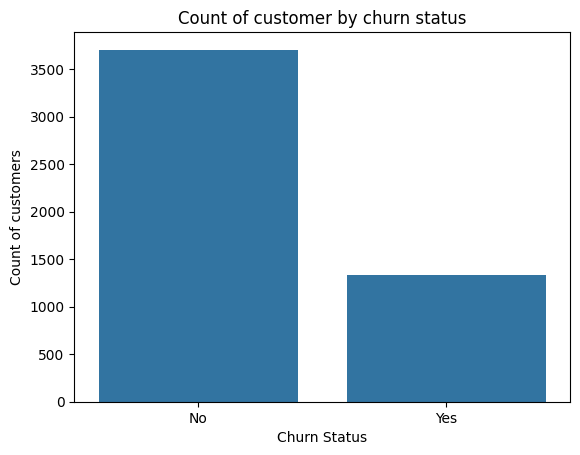

In [137]:
sns.barplot(data= churn_status_count)
plt.title('Count of customer by churn status')
plt.xlabel('Churn Status')
plt.ylabel('Count of customers')
plt.show()

In [139]:
# ratio of non-churners to churners
(churn_status_count/len(df_train['Churn'])) * 100


Churn
No     73.488003
Yes    26.492167
Name: count, dtype: float64

The ratio of non-churners to churners 73.5 : 26.5